# Sentiment Analysis P1

In this notebook, you will learn how to use different packages in Python to build a complete pipeline for solving sentiment analysis problem. We will be using the simplest model, Mutinomial NB, in this class.

## Pipeline

<img src="resources/pipeline.png">

## Get familiar with dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nlp_proj_utils import get_imdb_dataset
import sklearn as sk


pd.set_option('max_colwidth', 500)  # Set display column width to show more content

In [8]:
# Load dataset, download if necessary
train, test = get_imdb_dataset()

data already available, skip downloading.
imdb loaded successfully.


In [7]:
type(train)

pandas.core.frame.DataFrame

In [8]:
# Get a sample (head) of the data frame
train.sample(5)

,text,sentiment
12724,"Many of the lead characters in Hideo Gosha's 1969 film ""Hitokiri"" (manslayer; aka ""Tenchu"" -- heaven's punishment) were actual historical figures (in ""western"" name-order format): Ryoma Sakamoto, Hampeita Takechi, Shimbei Tanaka, Izo Okada, ____ Anenokoji. The name ""Hitokiri,"" a historical term, refers to a group of four super-swordsmen who carried out numerous assassinations of key figures in the ruling Tokugawa Shogunate in the mid-1800s under the orders of Takechi, the leader of the ""Loya...",neg
13740,"Personally I think this show looks pretty cheaply made. Some of the actors are terrible. They over do it & seem fake. I can always tell how it's going to end within the first 10 minutes or less of watching because they make it so transparently clear. It's not very well written either. I love to watch it to laugh at it. You know the saying ""It's so bad that it's good?"" Well, that saying applies to this show. I also like to watch just to see if I'm right when I guess how it's all going to end....",neg
23352,"I don't know what it is about this movie- director Sam Mraovich somehow messed up just about every little aspect in this movie. I would normally say that this is a movie that should not exist, but this movie may be the most important of all time. This movie should exist for the sole purpose of being without a doubt 'The Worst Movie Ever Made'. I've seen bad movies in my lifetime, but this somehow breaks what I considered bad into something much more hard to imagine.<br /><br />Everything in ...",neg
10892,"Morgan Freeman and Paz Vega are the mismatched pair who get in the car and go about doing errands according to the need of one or the other. Morgan Freeman is superbly human, relating with one and all, while Paz Vega is the edgy cashier behind the ""10 Items or Less"" check out line, intimidating customers and bored out of her mind. Together they explore, discover, and learn from each other. To do that of course they must be vulnerable, interested in change, and have a sense of humour, all of ...",pos
24057,"Somehow they summed up the 60's, ten years that radically changed our country, in four hours. And what a painful four hours it was. They trivilized the major events and happenings and they ""claimed"" it was about two families yet you barely saw the african-american family. If I were NBC I would be ashamed and embarrassed for airing such trash. What was amusing was this happy-go-lucky family you saw in the very beginning was tortured in so many ways, but managed to attend every major 60's even...",neg


In [9]:
print('train shape:', train.shape)
print('test  shape:', test.shape)

train shape: (25000, 2)
test  shape: (25000, 2)


In [10]:
# Statics on tags
train['sentiment'].value_counts()

pos    12500
neg    12500
Name: sentiment, dtype: int64

In [11]:
print(train['text'][1])

Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV's "Flamingo Road") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina's pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detective. The movie is nearly a cross-pollination of "Rosemary's Baby" and "The Exorcist"--but what a combination! Based on the best-seller by Jeffrey Konvitz, "The Sentinel" is entertainingly spooky, full of shocks brought off well by director Michael Winner, who mounts a thoughtfully downbeat en

See [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/10min.html?highlight=data%20frame) for more details.

## Preprocessing

### Tokenization and Normalization

For preprocessing, we will apply the following steps:

1. Remove HTML tag (`<br />` in this case) from the review text
2. Remove punctuations (replace with whitespace)
3. Split review text into tokens
4. Remove tokens that are considered as "**stopwords**"
5. For the rest, do lemmatization

In [3]:
import nltk
import string

In [13]:
# If this is the first time you use nltk, make sure to download necessary resources and pre-trained models
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
transtbl = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()

In [15]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
'ababc'.translate(str.maketrans('abc','def'))

'dedef'

In [4]:
def preprocessing(line: str) -> str:
    """
    Take a text input and return the preprocessed string.
    i.e.: preprocessed tokens concatenated by whitespace
    """
    line = line.replace('<br />', '').translate(transtbl)
    # list
    tokens = [lemmatizer.lemmatize(t.lower(),'v')
              for t in nltk.word_tokenize(line)
              if t.lower() not in stopwords]
    
    return ' '.join(tokens)

In [19]:
test_str = "I bought several books yesterday<br /> and I really love them!"
preprocessing(test_str)

'buy several book yesterday really love'

In [5]:
from tqdm.auto import tqdm
tqdm.pandas()

In [23]:
pip install pandarallel

  Using cached pandarallel-1.6.3-py3-none-any.whl
  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [ ]:
# If you're using macOS and Linux, you may run un-comment the following code to speed up the preprocessing

# !pip install pandarallel
# from pandarallel import pandarallel
# pandarallel.initialize(progress_bar=True)

In [12]:
# If you're using Windows, run the following, otherwise, comment this out, and run the second statement instead
#for df in train, test:
#    df['text_prep'] = df['text'].progress_apply(preprocessing)
    
# If you're using macOS or Linux, un-comment and run the following code
for df in train, test:
     df['text_prep'] = df['text'].parallel_apply(preprocessing)

In [13]:
assert train.shape == (25000, 3)
assert test.shape == (25000, 3)

In [14]:
train.sample(2)

,text,sentiment,text_prep
10123,"I haven't seen all of Jess Franco's movies, I have seen 5, I think, and there are more than 180 of them. So maybe it's a bit early to say so but ""Necronomicon Geträumte Sünden"" (better known as 'Succubus', but that is the cut version) is according to me if not the best, certainly on of Franco's best. Franco is best known (although 'known' might be slightly exaggerated) for ""Vampiros Lesbos"", a weird cultish movie that got more acclaim in the mid 90's when people found out Jess Franco was als...",pos,see jess franco movies see 5 think 180 maybe bite early say necronomicon geträumte sünden better know succubus cut version accord best certainly franco best franco best know although know might slightly exaggerate vampiros lesbos weird cultish movie get acclaim mid 90 people find jess franco also interest composer soundtrack happy discover man find expect see video clip lion cucumber vampyros lesbos ost jess franco overwhelm director phone ring vampiros let ring want see movie since moment f...
18479,"wow, the Naked Brothers Band. What should i say. I guess i can say this show just sucks. number one: they have no talent, they probably can't even play the instruments. number 2: on the commercial it said they were famous but nobody even heard of them till there crappy show came on. Look, i really don't hate it that bad, i'd give it like a 4 out of 10, but what annoys me is how everyone says they have such great talent and Nat is SO deep and writes deep lyrics. Deep my ass! he talks about ha...",neg,wow naked brothers band say guess say show suck number one talent probably even play instrument number 2 commercial say famous nobody even hear till crappy show come look really hate bad give like 4 10 annoy everyone say great talent nat deep write deep lyric deep ass talk hardcore wrestlers inner feel wow could read say wall bathroom would deep get famous parent famous celebrities want kid make bad show feel cancel soon


### Build Vocabulary

Instead of using `CountVectorizer` (N-gram) provided by sklearn directly, we will build the vocabulary on our own, so that we have more control over it.

<span style="color:red">**Tips:**</span>

We can only use words in training data for building vocabulary

In [15]:
all_words = [w for text in tqdm(train['text_prep']) 
             for w in text.split()]

  0%|          | 0/25000 [00:00<?, ?it/s]

In [16]:
# Use FreqDist to get count for each word
voca = nltk.FreqDist(all_words)
print(voca)

<FreqDist with 65102 samples and 3025774 outcomes>


In [17]:
voca.most_common(10)

[('film', 48184),
 ('movie', 44024),
 ('one', 26785),
 ('make', 23568),
 ('like', 22361),
 ('see', 20792),
 ('get', 18140),
 ('time', 16167),
 ('good', 15140),
 ('character', 14172)]

In [22]:
topwords = [word for word, _ in voca.most_common(10000)]
print([w for w in topwords if w not in stopwords[:20]])

['film', 'movie', 'one', 'make', 'like', 'see', 'get', 'time', 'good', 'character', 'go', 'watch', 'even', 'would', 'think', 'story', 'really', 'well', 'show', 'look', 'much', 'say', 'end', 'know', 'people', 'bad', 'also', 'first', 'great', 'give', 'act', 'take', 'play', 'love', 'come', 'way', 'find', 'could', 'movies', 'seem', 'work', 'plot', 'two', 'many', 'want', 'life', 'never', 'little', 'best', 'try', 'man', 'ever', 'better', 'still', 'scene', 'feel', 'part', 'scenes', 'back', 'something', 'use', 'interest', 'lot', 'real', 'star', 'though', 'cast', 'thing', 'old', 'years', 'actors', 'director', 'leave', 'live', 'guy', 'another', 'new', 'nothing', 'funny', 'write', '10', 'tell', 'actually', 'point', 'start', 'every', 'become', 'set', 'turn', 'world', 'us', 'quite', 'kill', 'things', 'action', 'pretty', 'young', 'happen', 'around', 'horror', 'mean', 'long', 'however', 'fact', 'right', 'big', 'line', 'enough', 'series', 'may', 'need', 'original', 'fan', 'script', 'bite', 'enjoy', 'k

### Vectorizer

For this section, we will try two ways to do vectorization: **BoW** (1-gram) and **BoW with Tfidf Transformer**.

In [19]:
from sklearn.feature_extraction.text import (
    CountVectorizer, 
    TfidfTransformer, 
    TfidfVectorizer,)

In [20]:
CountVectorizer()

CountVectorizer()

### Tf–idf Transformer

- Tf: Term-Frequency
- idf: Inverse Document-Frequency
- Tf-idf = $tf(t,d) \times idf(t)$

$$
idf(t) = log{\frac{1 + n_d}{1 + df(d, t)}} + 1
$$

![](http://www.onemathematicalcat.org/Math/Algebra_II_obj/Graphics/log_base_gt1.gif)

> Sentence 1: The boy **love** the toy <br>
> Sentence 2: The boy **hate** the toy

In [23]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

In [24]:
counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]
tfidf = transformer.fit_transform(counts)
tfidf

<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [25]:
tfidf.toarray()

array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.58149261, 0.        , 0.81355169]])

<span style="color:red">**Tips:**</span>

tf-idfs are computed slightly different in sklearn, where:

$$
idf(t) = log{\frac{n_d}{1 + df(d, t)}}
$$

With `smooth_idf=True` set to `True`, the formula is:

$$
idf(t) = log{\frac{n_d}{df(d, t)}} + 1
$$


It's always worth trying tfidf transformer for text classification problem. Since `CountVectorizer` and `TfidTransformer` are often chained together, sklearn also provide a class that combines the two steps together: `TfidfVectorizer`.

In [26]:
TfidfVectorizer()

TfidfVectorizer()

Let's take the sentences from the slide as an example:

In [28]:
t_corpus = ['the boy love the toy', 'the boy hate the toy']

In [29]:
# Bag of words
# Voc = ['boy', 'hate', 'love', 'the', 'toy']

t_cnt_vec = CountVectorizer()
t_cnt_vec.fit(' '.join(t_corpus).split())
t_cnt_vec.transform(t_corpus).toarray()

array([[1, 0, 1, 2, 1],
       [1, 1, 0, 2, 1]])

In [30]:
# Tfidf
t_tfidf_vec = TfidfVectorizer()
t_tfidf_vec.fit(' '.join(t_corpus).split())
t_tfidf_vec.transform(t_corpus).toarray()

array([[0.41508858, 0.        , 0.48828702, 0.6457389 , 0.41508858],
       [0.41508858, 0.48828702, 0.        , 0.6457389 , 0.41508858]])

### Vectorization / Featurization

In [31]:
train_x, train_y = train['text_prep'], train['sentiment']
test_x, test_y = test['text_prep'], test['sentiment']

In [32]:
# Use topwords as vocabulary
tf_vec = TfidfVectorizer(vocabulary=topwords)

In [33]:
train_features = tf_vec.fit_transform(train_x)
test_features = tf_vec.transform(test_x)

In [34]:
assert train_features.shape == (25000, 10000)
assert test_features.shape == (25000, 10000)

In [35]:
train_features[0][:50].toarray()

array([[0.       , 0.1287998, 0.       , ..., 0.       , 0.       ,
        0.       ]])

## Training

### [Multinomial NB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

The multinomial Naive Bayes classifier is suitable for **classification with discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
mnb_model = MultinomialNB()
mnb_model

MultinomialNB()

In [37]:
%%time

# Train Model
mnb_model.fit(train_features, train_y)

CPU times: user 81.7 ms, sys: 19.8 ms, total: 101 ms
Wall time: 108 ms


MultinomialNB()

## Evaluation

In [38]:
from sklearn import metrics

In [39]:
# Predict on test set
pred = mnb_model.predict(test_features)
print(pred)

['neg' 'pos' 'pos' ... 'neg' 'neg' 'neg']


In [40]:
print('Accuracy: %f' % metrics.accuracy_score(pred,test_y))

Accuracy: 0.833000


<span style="color:red">**Tips:**</span>

It doesn't matter if you change the order of `pred` and `test_y` passed into `accuracy_score` since the metrics is symmetric. **However**, it is extremely important that you pass them in the correct order when you need to calculate per-class metrics like f-score.

In [41]:
# Pass in as keyword arguments to make sure the order is correct
print(
    metrics.classification_report(y_true=test_y, y_pred=pred))

              precision    recall  f1-score   support

         neg       0.81      0.87      0.84     12500
         pos       0.86      0.80      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [42]:
# Example from sklearn documentation

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(metrics.classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



## Predict new text

In [43]:
def predict_new(prep_func,  # func for preprocessing
                vec,        # vectorizer
                model,      # model
                text):      # text
    
    prep_text = prep_func(text)
    features = vec.transform([prep_text])
    pred = model.predict(features)
    return pred[0]

In [44]:
from functools import partial

predict_new_p1 = partial(predict_new, preprocessing, tf_vec, mnb_model)

In [45]:
predict_new_p1('It looks nice')

'pos'

## Tunning hyper parameters

In [46]:
def train_with_n_topwords(n: int, tfidf=False) -> tuple:
    """
    Train and get the accuracy with different model settings
    Args:
        n: number of features (top frequent words in the vocabulary)
        tfidf: whether do tf-idf re-weighting or not
    Outputs:
        tuple: (accuracy score, classifier, vectorizer)
    """
    topwords = [word for word, _ in voca.most_common(n)]
    
    if tfidf:
        vec = TfidfVectorizer(vocabulary=topwords)
    else:
        vec = CountVectorizer(vocabulary=topwords)
    
    # Generate feature vectors
    train_features = vec.fit_transform(train_x)
    test_features  = vec.transform(test_x)
    
    # NB
    mnb_model = MultinomialNB()
    mnb_model.fit(train_features, train_y)
    
    # Test predict
    pred = mnb_model.predict(test_features)
    
    return metrics.accuracy_score(pred, test_y), mnb_model, vec

In [47]:
train_with_n_topwords(500, tfidf=True)

(0.82516,
 MultinomialNB(),
 TfidfVectorizer(vocabulary=['film', 'movie', 'one', 'make', 'like', 'see',
                             'get', 'time', 'good', 'character', 'go', 'watch',
                             'even', 'would', 'think', 'story', 'really', 'well',
                             'show', 'look', 'much', 'say', 'end', 'know',
                             'people', 'bad', 'also', 'first', 'great', 'give', ...]))

In [48]:
possible_n = [500 * i for i in range(1, 20)]

cnt_accuracies = []
tfidf_accuracies = []

for n in tqdm(possible_n):
    cnt_accuracies.append(train_with_n_topwords(n)[0])
    tfidf_accuracies.append(train_with_n_topwords(n, tfidf=True)[0])

  0%|          | 0/19 [00:00<?, ?it/s]

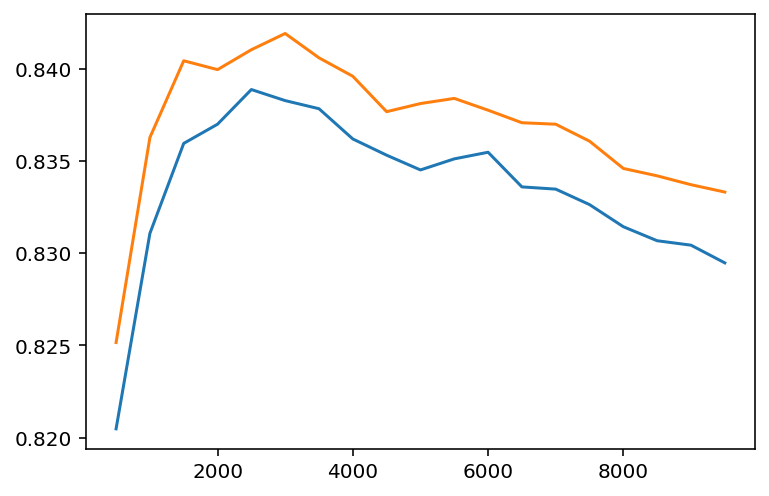

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.plot(possible_n, cnt_accuracies, label='Word Count')
plt.plot(possible_n, tfidf_accuracies, label='Tf-idf')

**Expected**:

<img src="resources/plot.png" width="400">

## Save model

In [50]:
_, model, vec = train_with_n_topwords(3000, tfidf=True)

In [51]:
import pickle

with open('tf_vec.pkl', 'wb') as fp:
    pickle.dump(vec, fp)
    
with open('mnb_model.pkl', 'wb') as fp:
    pickle.dump(model, fp)